# 面试

## 深度学习基础



## 模型评估方法

### Accuracy作为指标有哪些局限性？
<div align=center>
<img width="700" src="imgs/Roc&PR.jpg"/>
</div>
<div align=center>混淆矩阵</div>

准确率 **Accuracy** 反映了分类器对**整个样本的判断能力**：将正判定为正，负为负。
##### **当正负样本非常不平衡时，就算acc非常高，也不能说明模型性能好**
### 对于单标签的图片分类任务，可以用mean accuracy 来衡量

$$
Accuracy = \frac{TP+TN}{TP+FP+TN+FN}
$$

$$
Accuracy = \frac{TP+TN}{T+P}
$$

精确率 查准率 Precision： 预测为正样本的集合中，真正是正样本的比例。
$$
Precision = \frac {TP} {TP + FP}
$$

召回率 查全率 Recall： 真正的正样本集合中，被预测为正样本的比例。
$$ 
Recall = \frac {TP}{TP + FN}
$$

F-Measure
$$
F-Measure = \frac{2\times Precision \times Recall} {Precision + Recall}
$$

True Positive Rate: TPR 正样本中 被预测为正 的比例 与Recall 定义相同，越大越好
$$
TPR = \frac {TP} {TP + FN}
$$


False Positive Rate： FPR 负样本中被预测为正的比例 ， 越小越好。
$$
FPR = \frac {FP} {TN + FP}
$$





### ROC曲线和PR曲线各是什么？

<div align=center>
<img width="900" src="imgs/Roc-PR.jpg"/>
</div>
<div align=center>Roc 和 PR precision-recall 曲线</div>

The Relationship Between Precision-Recall and ROC Curves（ Receiver Operating Characteristic ）中证明了以下两条定理
定理1：对于一个给定的的数据集，ROC空间和PR空间存在一一对应的关系，因为二者包含完全一致的混淆矩阵。我们可以将ROC曲线转化为PR曲线，反之亦然。
定理2：对于一个给定数目的正负样本数据集，曲线 A 在 ROC 空间优于曲线 B ，当且仅当在 PR 空间中曲线 A 也优于曲线 B。
定理 2 中 “曲线A优于曲线B” 是指曲线 B 的所有部分与曲线 A 重合或在曲线 A 之下。而在ROC空间，ROC曲线越凸向左上方向效果越好。与ROC曲线左上凸不同的是，PR曲线是右上凸效果越好。
从定理 2 来看，ROC 空间和 PR 空间两个指标似乎具有冗余性，那么为什么还需要这同时两个指标呢？答案是在两者在样本不均衡的情况下表现有较大差异。!


PR 曲线是以 Recall 为横轴，Precision 为纵轴；而 ROC曲线则是以 FPR 为横轴，TPR 为纵轴。


综上，有以下几条结论（参考 机器学习之类别不平衡问题 (2) —— ROC和PR曲线）
	1. ROC曲线由于兼顾正例与负例，所以适用于评估分类器的整体性能(通常是会计算AUC，表示模型的rank性能)，相比而言PR曲线完全聚焦于正例。
	2. 如果有多份数据且存在不同的类别分布。比如信用卡欺诈问题中每个月正例和负例的比例可能都不相同，这时候如果只想单纯地比较分类器的性能且剔除类别分布改变的影响，则ROC曲线比较适合，因为类别分布改变可能使得PR曲线发生变化时好时坏，这种时候难以进行模型比较；反之，如果想测试不同类别分布下对分类器的性能的影响，则PR曲线比较适合。
	3. 如果想要评估在相同的类别分布下正例的预测情况，则宜选PR曲线。类别不平衡问题中，ROC曲线通常会给出一个乐观的效果估计，所以大部分时候还是PR曲线更好。(参考上面 Quora 的例子)
	4. 最后可以根据具体的应用，在曲线上找到最优的点，得到相对应的precision，recall，f1 score等指标，去调整模型的阈值，从而得到一个符合具体应用的模型。

来自 <https://wulc.me/2018/06/16/ROC%20%E6%9B%B2%E7%BA%BF%E4%B8%8E%20PR%20%E6%9B%B2%E7%BA%BF/> 


### PR曲线，怎么画呢？



In [86]:
import sklearn
X,y = sklearn.datasets.make_classification(n_samples=2000, n_features=10, n_informative=4,
                         n_redundant=1, n_classes=2, n_clusters_per_class=1,
                         weights=[0.9,0.1], flip_y=0.1, random_state=2018)


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_new = pca.transform(X)
print(X_new.shape)

(2000, 3)


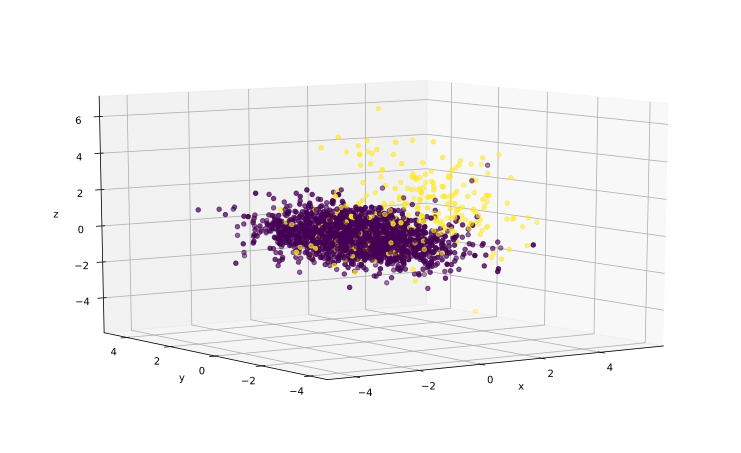

In [80]:
def draw_scatter(Points, Lables, axis = True, **kags):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    z_axis = Points[:,2]
    fig = plt.figure() 
    ax = Axes3D(fig) 

    ax.scatter(x_axis, y_axis, z_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10,azim=235)
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()
    
draw_scatter(X_new, y)

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.transform(X)
print(X_new.shape)

(2000, 2)


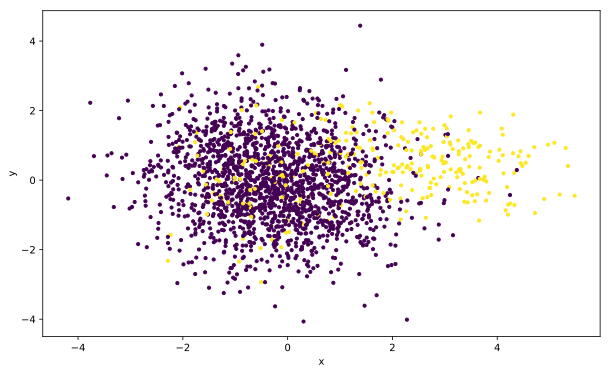

In [82]:
def draw_scatter2D(Points, Lables, axis = True, **kags):
    import matplotlib.pyplot as plt
    #from mpl_toolkits.mplot3d import Axes3D  
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    fig = plt.figure() 
   # ax = Axes3D(fig) 

    plt.scatter(x_axis, y_axis,s=10, c = Lables)
    # 设置坐标轴显示以及旋转角度
    plt.xlabel('x') 
    plt.ylabel('y')
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()
    
draw_scatter2D(X_new, y)

In [83]:
#将数据划分为训练集测试集
kf = sklearn.model_selection.StratifiedKFold(n_splits=2, random_state=42)

for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
    
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train, y_train)

pos_prob_lr = lr.predict_proba(X_test)[:,1]    # Logistic Regression的正例预测概率

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
pos_prob_rf = RF.predict_proba(X_test)[:,1]    # Random Forest的正例预测概率

print(pos_prob_lr.shape, pos_prob_rf.shape)

C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jarvis\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(999,) (999,)


In [84]:
print(pos_prob_lr[:10])

[0.15813023 0.12075471 0.02763748 0.00983065 0.06201179 0.04986294
 0.09926128 0.05632981 0.15558692 0.05856262]


## 编程实现AUC的计算，并指出复杂度？

需要对分类的socores进行排序，这个是主要的复杂度，然后需要遍历一遍，进行计算recall ,precision。


PR曲线展示的是Precision vs Recall的曲线，PR曲线与ROC曲线的相同点是都采用了TPR (Recall)，都可以用AUC来衡量分类器的效果。不同点是ROC曲线使用了FPR，而PR曲线使用了Precision，因此PR曲线的两个指标都聚焦于正例。类别不平衡问题中由于主要关心正例，所以在此情况下PR曲线被广泛认为优于ROC曲线。

PR曲线的绘制与ROC曲线类似，PR曲线的AUC面积计算公式为：

## AUC的特点

AUC（Area Under Curve）的值为ROC曲线下面的面积，若如上所述模型十分准确，则AUC为1。
但现实生活中尤其是工业界不会有如此完美的模型，一般AUC均在0.5到1之间，AUC越高，模型的区分能力越好，上图AUC为0.81。

若AUC=0.5，即与上图中红线重合，表示模型的区分能力与随机猜测没有差别。若AUC真的小于0.5，请检查一下是不是好坏标签标反了，或者是模型真的很差。


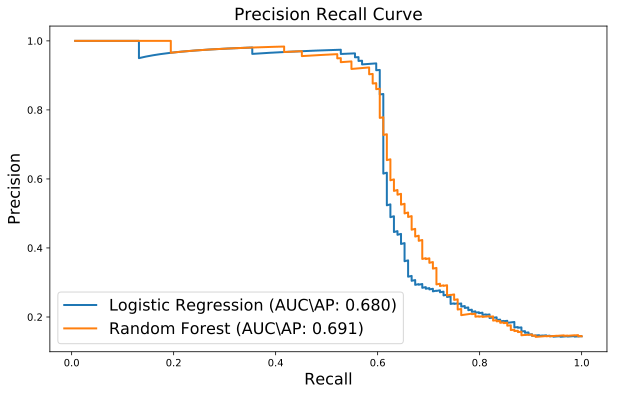

In [87]:
def get_pr(pos_prob,y_true):
    pos = y_true[y_true==1]
    threshold = np.sort(pos_prob)[::-1]
    y = y_true[pos_prob.argsort()[::-1]]
    recall = [] ; precision = []
    tp = 0 ; fp = 0
    auc = 0
    for i in range(len(threshold)):
        if y[i] == 1:
            tp += 1
            recall.append(tp/len(pos))
            #只有前面的一些可能是tp，后面的可以不用判断了，因为thres是从大到小排列的
            precision.append(tp/(tp+fp))
            auc += (recall[i]-recall[i-1])*precision[i]
        else:
            fp += 1
            recall.append(tp/len(pos))
            precision.append(tp/(tp+fp))
            
    return precision,recall,auc

precision_lr,recall_lr,auc_lr = get_pr(pos_prob_lr,y_test)
precision_rf,recall_rf,auc_rf = get_pr(pos_prob_rf,y_test)

plt.figure(figsize=(10,6))
plt.plot(recall_lr,precision_lr,label="Logistic Regression (AUC\AP: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(recall_rf,precision_rf,label="Random Forest (AUC\AP: {:.3f})".format(auc_rf),linewidth=2)
plt.xlabel("Recall",fontsize=16)
plt.ylabel("Precision",fontsize=16)
plt.title("Precision Recall Curve",fontsize=17)
plt.legend(fontsize=16)




### PR曲线 -- 应用 对于多标签的任务，例如目标识别，mAP（mean Average Precision）


通过PR曲线，我可以可以得到PR曲线对应的AP值。

在2010年以前，PASCAL VOC竞赛中AP是这么定义的：对于一条AP曲线，我们把recall的值从0到1划分为11份：0、0.1、0.2、0.3、0.4、0.5、0.6、0.7、0.8、0.9、1.0。在每个recall区间（0-0.1, 0.1-0.2，0.2-0.3，…，0.9-1.0）上我们计算精确率的最大值，然后再计算这些精确率最大值的总和并平均，就是AP值。

这种方法叫做11-poinst-interpolation。

从2010年之后，PASCAL VOC竞赛把这11份recall点换成了PR曲线中的所有recall数据点。这种方法叫做all-points-interpolation。这个AP值也就是PR曲线下的面积值。


当我们可以计算出每个物体类别对应的模型AP后，我们只需要对于所有AP求和再平均，就可以得到用于评估目标检测模型的mAP了。
https://www.zhihu.com/question/41540197

### ROC曲线 -- AUC

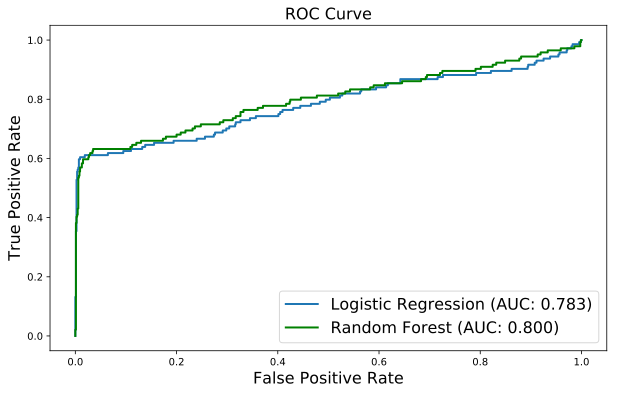

In [64]:
def get_roc(pos_prob,y_true):
    pos = y_true[y_true==1]
    neg = y_true[y_true==0]
    threshold = np.sort(pos_prob)[::-1]        # 按概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]
    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))
    y_step = 1/float(len(pos))
    y_sum = 0                                  # 用于计算AUC
    # ROC曲线 计算时， 分母是不会变的，所以用一个step 可以代替计算。
    for i in range(len(threshold)):
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            
            y_sum += tpr
    return tpr_all,fpr_all,y_sum*x_step         # 获得总体TPR，FPR和相应的AUC

tpr_lr,fpr_lr,auc_lr = get_roc(pos_prob_lr,y_test)  
tpr_rf,fpr_rf,auc_rf = get_roc(pos_prob_rf,y_test)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression (AUC: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(fpr_rf,tpr_rf,'g',label="Random Forest (AUC: {:.3f})".format(auc_rf),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)

In [71]:
import numpy as np
from sklearn.metrics import roc_curve, auc

y = np.array([1, 1, 1, 1, 1,
              2, 2, 2, 2, 2])
y_proba = np.array([0.1, 0.4, 0.4, 0.3, 0.5,
                    0.4, 0.6, 0.7, 0.8, 0.5])   # probability of prediction as positive

fpr, tpr, thresholds = roc_curve(y, y_proba, pos_label=2)
auc = auc(fpr, tpr)

FPR,TPR,thres1 = roc_curve(y_test, pos_prob_lr)
FPR2,TPR2,thres2= roc_curve(y_test, pos_prob_rf)

In [72]:
auc

0.9

In [73]:
print(fpr, tpr, thresholds)
import sys
sys.path.append("..") 
import dl_utils
import imp
imp.reload(dl_utils)

[0.  0.  0.  0.2 0.6 1. ] [0.  0.2 0.6 0.8 1.  1. ] [1.8 0.8 0.6 0.5 0.4 0.1]


<module 'dl_utils' from '..\\dl_utils.py'>

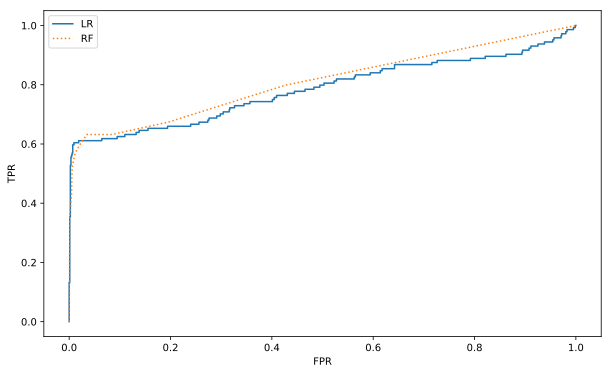

In [76]:
dl_utils.plotxy(FPR, TPR,'FPR','TPR',FPR2,TPR2,legend = ["LR" , "RF"], figsize=(10,6))

In [28]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

ROC曲线的缺点
上文提到ROC曲线的优点是不会随着类别分布的改变而改变，但这在某种程度上也是其缺点。因为负例N增加了很多，而曲线却没变，这等于产生了大量FP。像信息检索中如果主要关心正例的预测准确性的话，这就不可接受了。
在类别不平衡的背景下，负例的数目众多致使FPR的增长不明显，导致ROC曲线呈现一个过分乐观的效果估计。ROC曲线的横轴采用FPR，根据FPR = [公式] = [公式] ，当负例N的数量远超正例P时，FP的大幅增长只能换来FPR的微小改变。结果是虽然大量负例被错判成正例，在ROC曲线上却无法直观地看出来。（当然也可以只分析ROC曲线左边一小段）
举个例子，假设一个数据集有正例20，负例10000，开始时有20个负例被错判， [公式] ，接着又有20个负例错判， [公式] ，在ROC曲线上这个变化是很细微的。而与此同时Precision则从原来的0.5下降到了0.33，在PR曲线上将会是一个大幅下降。

## 余弦距离 和 欧式距离

对于 A =(x,y) B = (x_1,y_1)

余弦距离 = cos(A,B) = (x\*y)/(|x|\*|y|)

欧式距离 = Sqrt((A-B)^2)

总体来说，欧氏距离体现数值上的绝对差异，而余弦距离体现方向上的相对差异。

1）例如，统计两部剧的用户观看行为，用户A的观看向量为(0,1)，用户B为(1,0)；此时二者的余弦距很大，而欧氏距离很小；我们分析两个用户对于不同视频的偏好，更关注相对差异，显然应当使用余弦距离。

2）而当我们分析用户活跃度，以登陆次数(单位：次)和平均观看时长(单：分钟)作为特征时，余弦距离会认为(1,10)、(10,100)两个用户距离很近；但显然这两个用户活跃度是有着极大差异的，此时我们更关注数值绝对差异，应当使用欧氏距离。

一、为什么用余弦相似度，而不是欧式距离？
余弦相似度：取值范围[-1,1]
余弦距离=1-余弦相似度：取值范围[0,2]

余弦相似度在高维的情况下依然保持“相同时为1，正交时为0，相反时为-1”的性质。
欧式距离的数值受维度的影响，范围不固定，并且含义也比较模糊。
欧式距离体现数值上的绝对差异，而余弦距离体现方向上的相对差异。